<center>

CS506_02_IN: Programming for Computing

School of Technology & Computing (STC)

Data Analysis on Netflix Titles Dataset


Jheyne de Oliveira Panta Cordeiro, 
Reema Ramchandra Kadechkar,
Gurvareddy Padigapati

<center>

Loading data with Pandas:

In this cell, the pandas library is imported with the alias pd, which is a common convention for concise code. Pandas is a powerful Python library used for data manipulation and analysis, offering data structures like DataFrames and Series for structured data processing. The read_excel() function is used to load the Netflix dataset from an Excel file (netflix_titles.xlsx) into a DataFrame object df. DataFrames are tabular data structures that allow easy access, cleaning, and analysis of data. The head() method is then called to display the first 5 rows of the DataFrame, providing a quick overview of the dataset's structure and content.

In [8]:
'''
In this cell, the pandas library is imported with the alias pd, which is a common convention for concise code. 
Pandas is a powerful Python library used for data manipulation and analysis, offering data structures like DataFrames and Series for structured data processing.
The read_excel() function is used to load the Netflix dataset from an Excel file (netflix_titles.xlsx) into a DataFrame object df. 
DataFrames are tabular data structures that allow easy access, cleaning, and analysis of data. 
The head() method is then called to display the first 5 rows of the DataFrame, providing a quick overview of the dataset's structure and content.
'''
import pandas as pd

# Correct method to load a CSV file
df = pd.read_csv('netflix_titles.csv')

# Display the first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Selecting Key Features for Analysis:

This cell focuses on selecting specific columns from the DataFrame df to simplify the dataset for analysis. The columns chosen are 'type', 'country', 'release_year', and 'duration'. By subsetting the DataFrame, the code reduces the dataset to only the columns relevant for further analysis, such as exploring the distribution of content types, countries of origin, release years, and durations. The head() method is used again to confirm the changes and display the first 5 rows of the filtered DataFrame.

In [9]:
'''
This cell focuses on selecting specific columns from the DataFrame df to simplify the dataset for analysis. 
The columns chosen are 'type', 'country', 'release_year', and 'duration'.
By subsetting the DataFrame, the code reduces the dataset to only the columns relevant for further analysis, such as exploring the distribution of content types, countries of origin, release years, and durations. 
The head() method is used again to confirm the changes and display the first 5 rows of the filtered DataFrame.
'''
#Selecting Relevant Columns
df = df[['type', 'country', 'release_year', 'duration']]
df.head()



,type,country,release_year,duration
0,Movie,United States,2020,90 min
1,TV Show,South Africa,2021,2 Seasons
2,TV Show,NaN,2021,1 Season
3,TV Show,NaN,2021,1 Season
4,TV Show,India,2021,2 Seasons


Data Cleaning and Duration Parsing:

This cell performs data cleaning operations to prepare the dataset for analysis. 

Dropping Missing Values: The dropna() method removes rows with any missing values (NaN), ensuring the dataset contains only complete records.

Type Conversion: The 'duration' column is converted to a string type to facilitate further processing. 

Extracting Numeric Values: Using regular expressions (str.extract()), the code extracts the numeric part of the 'duration' column (e.g., converting "90 min" to 90 and "2 Seasons" to 2). The extracted values are then converted to integers for numerical analysis.

Displaying Cleaned Data: The head() method shows the first 5 rows of the cleaned DataFrame, confirming the transformations.

In [10]:
'''
This cell performs data cleaning operations to prepare the dataset for analysis:
Dropping Missing Values: The dropna() method removes rows with any missing values (NaN), ensuring the dataset contains only complete records.
Type Conversion: The 'duration' column is converted to a string type to facilitate further processing.
Extracting Numeric Values: Using regular expressions (str.extract()), the code extracts the numeric part of the 'duration' column (e.g., converting "90 min" to 90 and "2 Seasons" to 2). The extracted values are then converted to integers for numerical analysis.
Displaying Cleaned Data: The head() method shows the first 5 rows of the cleaned DataFrame, confirming the transformations.
'''
# Drop rows with missing values
df = df.dropna()

# Ensure the 'duration' column is string type
df['duration'] = df['duration'].astype(str)

# Extract numeric part of the 'duration' (e.g., "90 min" -> 90, "2 Seasons" -> 2)
df['duration'] = df['duration'].str.extract(r'(\d+)').astype(int)

# Show cleaned data
df.head()


,type,country,release_year,duration
0,Movie,United States,2020,90
1,TV Show,South Africa,2021,2
4,TV Show,India,2021,2
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",1993,125
8,TV Show,United Kingdom,2021,9


Random Forest Classification: Predicting Content Type

This cell trains a Random Forest classifier to predict the type of Netflix content (Movie or TV Show) based on 'duration' and 'release_year':

Feature and Target Selection: The features (X) are 'duration' and 'release_year', while the target (y) is the 'type' column. The target labels are encoded as 0 for "Movie" and 1 for "TV Show."

Train-Test Split: The dataset is split into training (80%) and testing (20%) sets using train_test_split().

Model Training: A Random Forest classifier (RandomForestClassifier) is trained on the training data.

Evaluation: The model's performance is evaluated on the test set using classification_report(), which displays precision, recall, F1-score, and accuracy metrics. The results show high accuracy (1.00), indicating perfect performance on this simplified dataset.

In [11]:
'''
This cell trains a Random Forest classifier to predict the type of Netflix content (Movie or TV Show) based on 'duration' and 'release_year':
Feature and Target Selection: The features (X) are 'duration' and 'release_year', while the target (y) is the 'type' column. The target labels are encoded as 0 for "Movie" and 1 for "TV Show."
Train-Test Split: The dataset is split into training (80%) and testing (20%) sets using train_test_split().
Model Training: A Random Forest classifier (RandomForestClassifier) is trained on the training data.
Evaluation: The model's performance is evaluated on the test set using classification_report(), which displays precision, recall, F1-score, and accuracy metrics. The results show high accuracy (1.00), indicating perfect performance on this simplified dataset.
'''

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select features and target
X = df[['duration', 'release_year']]
y = df['type']

# Encode target labels (Movie = 0, TV Show = 1)
y = y.map({'Movie': 0, 'TV Show': 1})

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       0.99      1.00      1.00       458

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595



Logistic Regression: Binary Classification of Netflix Titles

This cell trains a Logistic Regression model for the same classification task as the Random Forest:

Model Training: A Logistic Regression model (LogisticRegression) is trained on the training data with max_iter=1000 to ensure convergence.

Prediction and Evaluation: The model predicts the target values for the test set, and its performance is evaluated using classification_report(). 
The results show perfect accuracy (1.00), similar to the Random Forest model, suggesting that the task is straightforward with the given features.

In [12]:
'''
This cell trains a Logistic Regression model for the same classification task as the Random Forest:
Model Training: A Logistic Regression model (LogisticRegression) is trained on the training data with max_iter=1000 to ensure convergence.
Prediction and Evaluation: The model predicts the target values for the test set, and its performance is evaluated using classification_report(). 
The results show perfect accuracy (1.00), similar to the Random Forest model, suggesting that the task is straightforward with the given features.
'''

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# Evaluate the model performance
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1137
           1       0.99      1.00      1.00       458

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595



KMeans Clustering: Grouping Netflix Titles by Duration and Release Year

This cell performs KMeans clustering on the Netflix dataset:

Library Imports: The required libraries — KMeans from sklearn.cluster and pyplot from matplotlib — are imported for clustering and visualization.

Feature Selection: Numeric features 'duration' and 'release_year' are selected from the DataFrame for clustering input.

Clustering: A KMeans model with 3 clusters is initialized and fitted to the selected data. The resulting cluster labels are added to the DataFrame under the 'cluster' column.

Visualization: A scatter plot is generated to visualize the clusters based on 'release_year' and 'duration', with colors representing different cluster groups.

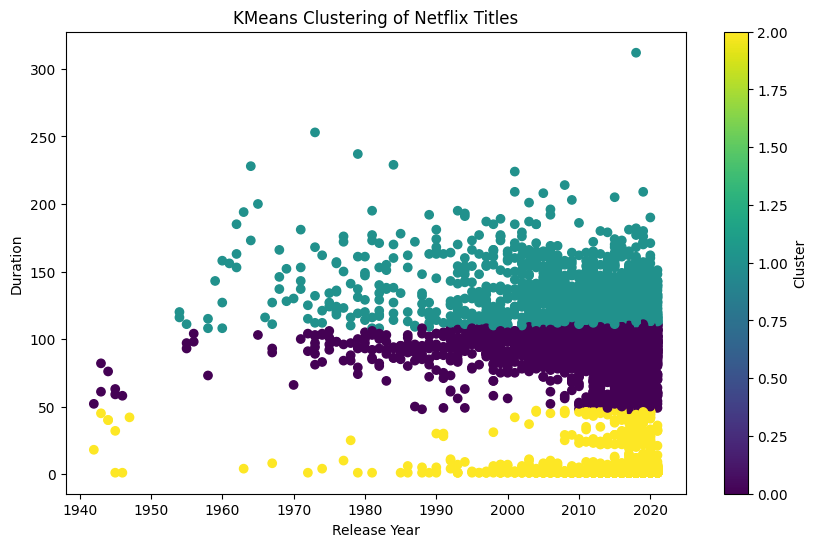

In [17]:
'''
This cell performs KMeans clustering on the Netflix dataset:
Library Imports: The required libraries — KMeans from sklearn.cluster and pyplot from matplotlib — are imported for clustering and visualization.
Feature Selection: Numeric features 'duration' and 'release_year' are selected from the DataFrame for clustering input.
Clustering: A KMeans model with 3 clusters is initialized and fitted to the selected data. The resulting cluster labels are added to the DataFrame under the 'cluster' column.
Visualization: A scatter plot is generated to visualize the clusters based on 'release_year' and 'duration', with colors representing different cluster groups.
'''

# Import required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select numeric features for clustering
X = df[['duration', 'release_year']]

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['release_year'], df['duration'], c=df['cluster'], cmap='viridis')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('KMeans Clustering of Netflix Titles')
plt.colorbar(label='Cluster')
plt.show()


Gaussian Mixture Modeling: Soft Clustering of Netflix Titles

This cell performs clustering using the Gaussian Mixture Model (GMM) on the Netflix dataset:

Library Imports: GaussianMixture from sklearn.mixture is used for probabilistic clustering, and matplotlib.pyplot is used for visualization.

Feature Selection: The numeric features 'duration' and 'release_year' are selected as input for clustering.

Clustering: A GMM model with 3 components is initialized and fitted to the data. Cluster assignments are predicted and stored in `clusters_gmm`.

Visualization: A scatter plot is created to visualize the clustered data, with each point colored according to its assigned cluster. A colorbar shows cluster labels, and the axes represent release year and duration.

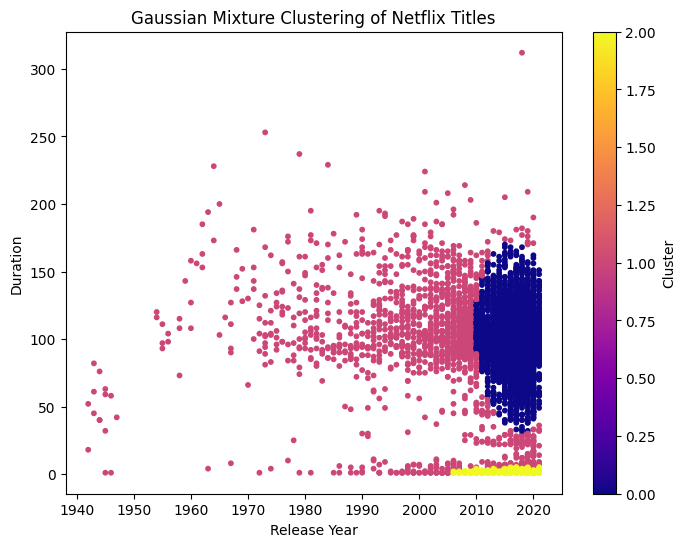

In [14]:
'''
This cell performs clustering using the Gaussian Mixture Model (GMM) on the Netflix dataset:
Library Imports: GaussianMixture from sklearn.mixture is used for probabilistic clustering, and matplotlib.pyplot is used for visualization.
Feature Selection: The numeric features 'duration' and 'release_year' are selected as input for clustering.
Clustering: A GMM model with 3 components is initialized and fitted to the data. Cluster assignments are predicted and stored in `clusters_gmm`.
Visualization: A scatter plot is created to visualize the clustered data, with each point colored according to its assigned cluster. A colorbar shows cluster labels, and the axes represent release year and duration.
'''

# Import required libraries
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Select features for clustering
X = df[['duration', 'release_year']]

# Apply Gaussian Mixture Model with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X['release_year'], X['duration'], c=clusters_gmm, cmap='plasma', s=10)
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Gaussian Mixture Clustering of Netflix Titles')
plt.colorbar(label='Cluster')
plt.show()


Evaluating Model Robustness with Cross-Validation

This cell evaluates a Random Forest model using cross-validation:

Library Imports: Imports `cross_val_score` for model evaluation and `RandomForestClassifier` for training.

Data Preparation: Features (`duration` and `release_year`) are selected. The target variable `type` is encoded to binary — 'Movie' as 1 and 'TV Show' as 0.

Model Evaluation: A Random Forest model is initialized and evaluated using 5-fold cross-validation. The `accuracy` score is used as the metric.

Output: Cross-validation scores for each fold are printed, along with the average accuracy, providing an estimate of model performance across different data splits.


In [15]:
'''
This cell evaluates a Random Forest model using cross-validation:
Library Imports: Imports `cross_val_score` for model evaluation and `RandomForestClassifier` for training.
Data Preparation: Features (`duration` and `release_year`) are selected. The target variable `type` is encoded to binary — 'Movie' as 1 and 'TV Show' as 0.
Model Evaluation: A Random Forest model is initialized and evaluated using 5-fold cross-validation. The `accuracy` score is used as the metric.
Output: Cross-validation scores for each fold are printed, along with the average accuracy, providing an estimate of model performance across different data splits.
'''

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Prepare features and labels again
X = df[['duration', 'release_year']]
y = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)  # Movie = 1, TV Show = 0

# Use Random Forest for evaluation
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.9968652  0.99498433 0.99874608 0.99811794 0.99937265]
Average accuracy: 0.9976172401993368


Visualizing the Distribution of Movies and TV Shows

This cell visualizes the distribution of content types in the Netflix dataset:

Library Imports: Seaborn and Matplotlib libraries are imported for data visualization.

Bar Plot: A count plot is created using seaborn's countplot() to display the frequency of each content type (e.g., Movie, TV Show) in the dataset.

Customization: The plot is enhanced with a title and axis labels for better readability.

Display: The final plot is rendered using plt.show(), providing a clear visual summary of the content type distribution.

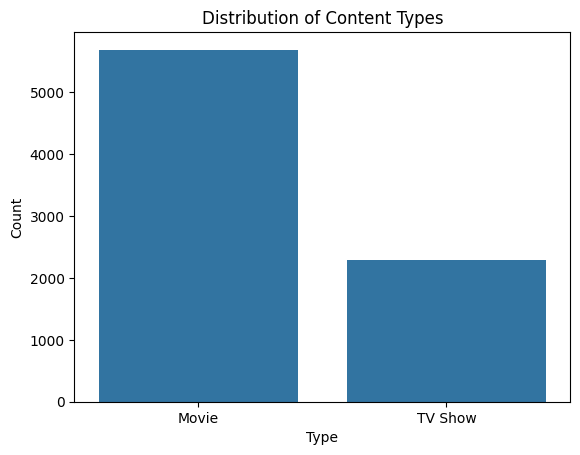

In [16]:
'''
This cell visualizes the distribution of content types in the Netflix dataset:
Library Imports: Seaborn and Matplotlib libraries are imported for data visualization.
Bar Plot: A count plot is created using seaborn's countplot() to display the frequency of each content type (e.g., Movie, TV Show) in the dataset.
Customization: The plot is enhanced with a title and axis labels for better readability.
Display: The final plot is rendered using plt.show(), providing a clear visual summary of the content type distribution.
'''

import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar chart of content types
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
